In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [4]:
df = pd.read_csv('./python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])

In [5]:
# scores 배열의 평균을 계산합니다.
p_mean = np.mean(scores)
# scores 배열의 분산을 계산합니다.
p_var = np.var(scores)

# 계산된 평균과 분산 값을 출력합니다.
p_mean, p_var

(69.530, 206.669)

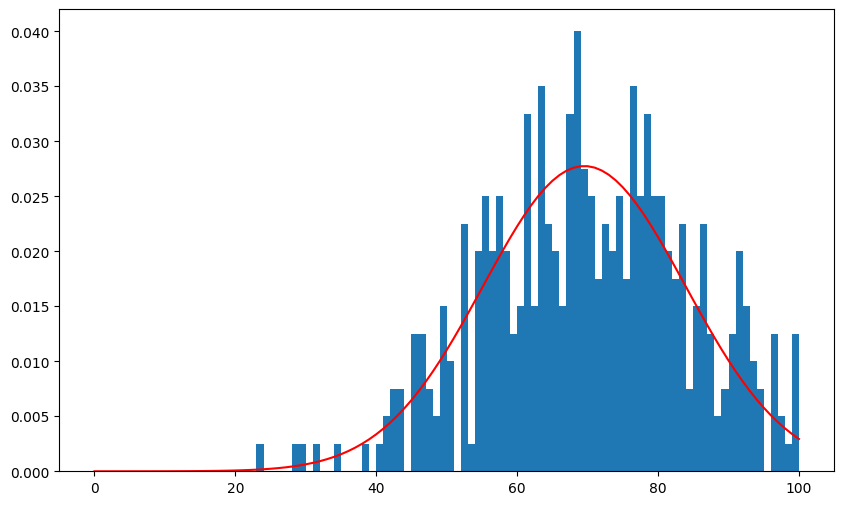

In [7]:
# 10x6 인치 크기의 새로운 그래프 창을 설정합니다.
fig = plt.figure(figsize=(10, 6))
# 1x1 그리드에 첫 번째 subplot을 추가합니다.
ax = fig.add_subplot(111)

# 0부터 100까지의 정수 배열을 생성합니다.
xs = np.arange(101)

# 평균이 p_mean이고 표준편차가 p_var의 제곱근인 정규분포 객체를 생성합니다.
rv = stats.norm(p_mean, np.sqrt(p_var))

# xs에 대한 정규분포의 확률밀도함수를 그립니다. 색상은 빨간색으로 설정합니다.
ax.plot(xs, rv.pdf(xs), color='red')

# scores 데이터에 대한 히스토그램을 그립니다.
# bins=100은 100개의 막대로 나눈다는 의미이고, range=(0, 100)은 히스토그램의 범위를 지정합니다.
# density=True는 히스토그램을 확률 밀도로 나타내어 전체 면적이 1이 되게 합니다.
ax.hist(scores, bins=100, range=(0, 100), density=True)

# 그래프를 화면에 표시합니다.
plt.show()

In [8]:
# 랜덤 시드를 설정하여 결과를 재현할 수 있게 합니다.
np.random.seed(0)

# 샘플의 크기를 20으로 설정합니다.
n = 20

# 'scores' 배열에서 무작위로 n개의 요소를 선택하여 'sample' 배열을 생성합니다.
sample = np.random.choice(scores, n)

# 선택된 샘플을 출력합니다.
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [9]:
# 랜덤 시드를 설정하여 결과의 재현성을 보장합니다.
np.random.seed(1111)

# 추출할 샘플의 수를 10000으로 설정합니다.
n_samples = 10000

# 'scores' 배열에서 n번 반복하여 무작위 샘플을 추출합니다.
# 여기서 (n_samples, n)은 추출할 샘플의 형태를 의미합니다.
# 결과적으로 n_samples x n 크기의 2차원 배열이 생성됩니다.
samples = np.random.choice(scores, (n_samples, n))

In [11]:
# 'samples' 배열에서 처음 5개의 표본에 대해 반복합니다.
for i in range(5):
    
    # i번째 표본의 평균을 계산합니다.
    s_mean = np.mean(samples[i])
    
    # 계산된 표본평균을 소수점 셋째 자리까지 출력합니다.
    print(f'{i+1}번째 표본평균: {s_mean:.3f}')

1번째 표본평균: 67.000
2번째 표본평균: 72.850
3번째 표본평균: 69.200
4번째 표본평균: 64.450
5번째 표본평균: 72.650


In [12]:
# 'samples' 배열의 각 표본(행)에 대한 평균을 계산하여 'sample_means' 배열에 저장합니다.
# axis=1 파라미터는 각 행에 대해 평균을 계산하라는 의미입니다.
sample_means = np.mean(samples, axis=1)

# 'sample_means' 배열에 저장된 모든 표본평균의 평균을 계산합니다.
np.mean(sample_means)

69.538

In [13]:
# 'scores' 배열에서 1백만 개의 샘플을 무작위로 선택하고, 선택된 샘플의 평균을 계산합니다.
np.mean(np.random.choice(scores, int(1e6)))

69.543

In [14]:
# 'sample' 배열의 모든 요소의 평균값을 계산하여 's_mean'에 저장합니다.
s_mean = np.mean(sample)
s_mean

70.400

In [21]:
# 'samples' 배열에서 처음 5개의 표본에 대해 반복합니다.
for i in range(5):
    
    # i번째 표본의 분산을 계산합니다.
    s_var = np.var(samples[i])
    
    # 계산된 표본분산을 소수점 셋째 자리까지 출력합니다.
    print(f'{i+1}번째 표본분산: {s_var:.3f}')

1번째 표본분산: 116.800
2번째 표본분산: 162.928
3번째 표본분산: 187.060
4번째 표본분산: 149.148
5번째 표본분산: 111.528


In [22]:
# 'samples' 배열의 각 표본(행)에 대한 분산을 계산하여 'sample_vars' 배열에 저장합니다.
# axis=1 파라미터는 각 행에 대해 연산을 수행하라는 의미입니다.
sample_vars = np.var(samples, axis=1)

# 'sample_vars' 배열에 저장된 모든 표본분산의 평균을 계산합니다.
np.mean(sample_vars)

196.344

In [23]:
# 'samples' 배열의 각 표본(행)에 대한 불편 분산을 계산합니다.
# axis=1 파라미터는 행별로 연산을 하라는 의미입니다.
# ddof=1 파라미터는 자유도를 n-1로 설정하여 불편 분산을 계산합니다.
sample_u_vars = np.var(samples, axis=1, ddof=1)

# 계산된 불편 분산들의 평균을 구합니다.
np.mean(sample_u_vars)

206.678

In [24]:
# 'scores' 배열에서 1백만 개의 샘플을 무작위로 선택하고,
# 선택된 샘플의 불편 분산을 계산하여 그 값을 반환합니다.
# ddof=1은 불편 분산을 계산하기 위해 자유도를 n-1로 설정합니다.
np.var(np.random.choice(scores, int(1e6)), ddof=1)

206.480

In [25]:
# 'sample' 배열에 대한 불편 분산을 계산합니다.
# ddof=1로 설정하여 자유도를 n-1로 설정합니다. 이는 불편 추정치를 얻기 위함입니다.
u_var = np.var(sample, ddof=1)
u_var

158.253

In [26]:
# 표준 정규분포 객체를 생성합니다.
rv = stats.norm()
# 신뢰구간의 하한을 계산합니다.
# 상위 2.5% 지점의 z값(rv.isf(0.025))을 표본 분산의 표준편차(np.sqrt(p_var/n))와 곱한 뒤 표본 평균에서 뺍니다.
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
# 신뢰구간의 상한을 계산합니다.
# 하위 2.5% 지점의 z값(rv.isf(0.975))을 표본 분산의 표준편차와 곱한 뒤 표본 평균에서 뺍니다.
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

# 계산된 하한과 상한 값을 출력합니다.
lcl, ucl

(64.100, 76.700)

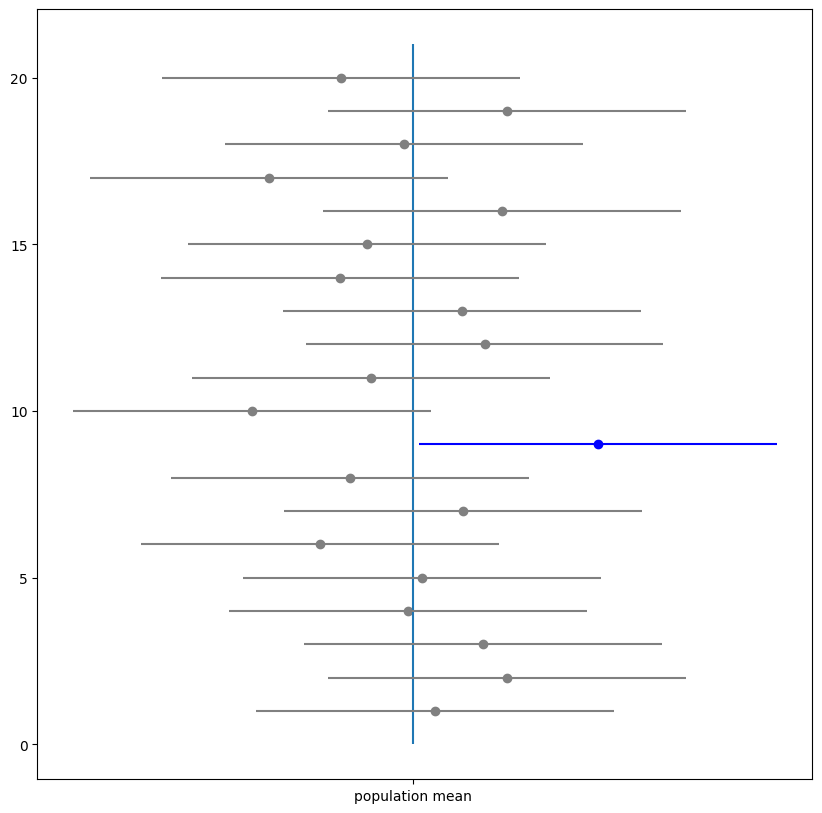

In [27]:
# 그래프의 크기를 10x10 인치로 설정합니다.
fig = plt.figure(figsize=(10, 10))
# 서브플롯을 추가합니다.
ax = fig.add_subplot(111)

# 표준 정규분포 객체를 생성합니다.
rv = stats.norm()
# 사용할 표본의 수를 20으로 설정합니다.
n_samples = 20
# 모집단 평균 p_mean을 수직선으로 그립니다.
ax.vlines(p_mean, 0, 21)

# 각 표본에 대해 반복하여 신뢰구간을 계산하고 그립니다.
for i in range(n_samples):
    # i번째 표본을 가져옵니다.
    sample_ = samples[i]
    # i번째 표본의 평균을 계산합니다.
    s_mean_ = np.mean(sample_)
    # i번째 표본의 평균에 대한 95% 신뢰구간의 하한을 계산합니다.
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    # i번째 표본의 평균에 대한 95% 신뢰구간의 상한을 계산합니다.
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    # 모집단 평균이 신뢰구간 안에 있는 경우 그래프에 회색으로 표시합니다.
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, color='gray')
    # 모집단 평균이 신뢰구간 밖에 있는 경우 그래프에 파란색으로 표시합니다.
    else:
        ax.scatter(s_mean_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, color='b')
    # x축에 'population mean'이라는 레이블을 붙입니다.
    ax.set_xticks([p_mean])
    ax.set_xticklabels(['population mean'])

# 그래프를 화면에 표시합니다.
plt.show()

In [29]:
# stats.norm()은 표준 정규 분포 객체를 생성합니다. 이 객체를 사용하여 표준 정규 분포의 역함수(isf) 값을 구할 수 있습니다.
rv = stats.norm()

# cnt 변수는 모평균을 포함하는 신뢰 구간의 수를 카운트하기 위한 변수입니다.
cnt = 0

# samples는 관측된 표본 집합들을 나타내며, 이것을 반복 처리하기 위한 for 루프입니다.
for sample_ in samples:
    # s_mean_는 현재 표본의 평균을 계산합니다.
    s_mean_ = np.mean(sample_)

    # lcl은 하한 신뢰 한계(lower confidence limit)를 계산합니다.
    # 여기서 rv.isf(0.025)는 표준 정규 분포의 97.5% 지점의 값입니다.
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)

    # ucl은 상한 신뢰 한계(upper confidence limit)를 계산합니다.
    # 여기서 rv.isf(0.975)는 표준 정규 분포의 2.5% 지점의 값입니다.
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)

    # 만약 계산된 신뢰 구간이 모평균(p_mean)을 포함한다면, 카운트를 1 증가시킵니다.
    if lcl <= p_mean <= ucl:
        cnt += 1

# cnt를 표본의 총 수(len(samples))로 나누어 모평균을 포함하는 신뢰 구간의 비율을 계산합니다.
cnt / len(samples)

0.951

In [30]:
# sample_u_vars는 각 표본의 불편 분산(unbiased variance)을 담고 있는 배열이거나 값입니다.
# n은 각 표본의 크기입니다.
# p_var는 모분산을 나타냅니다.

# 카이제곱 통계량을 계산합니다. 이 통계량은 표본 분산을 모분산으로 나눈 값에 표본 크기에서 1을 뺀 값을 곱한 것입니다.
# 이 통계량은 자유도가 n-1인 카이제곱 분포를 따릅니다.
sample_y = sample_u_vars * (n-1) / p_var

# 계산된 카이제곱 통계량을 반환합니다.
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

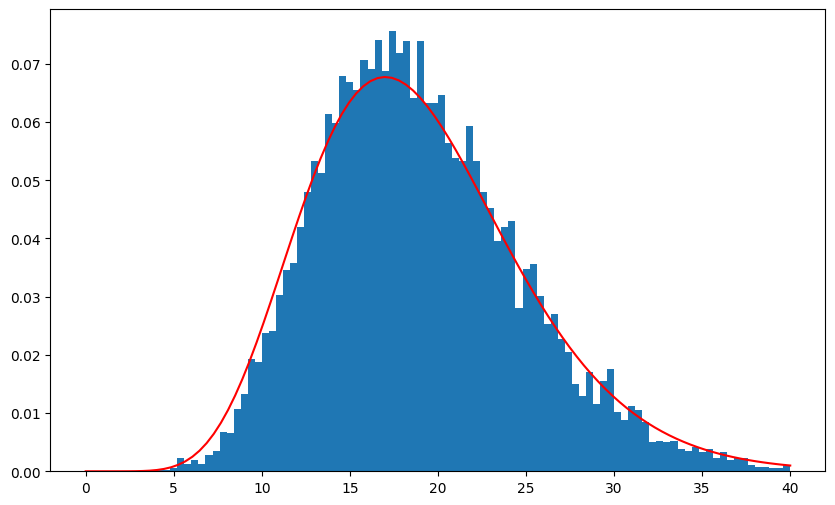

In [32]:
# 'plt.figure'를 사용하여 10x6 크기의 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(10, 6))

# 'add_subplot'을 이용하여 기본 좌표축을 추가합니다.
ax = fig.add_subplot(111)

# 'np.linspace'를 이용하여 0부터 40까지 100개의 균등한 간격을 가진 배열을 생성합니다.
xs = np.linspace(0, 40, 100)

# 'stats.chi2'를 이용하여 자유도가 n-1인 카이제곱 분포 객체를 생성합니다.
rv = stats.chi2(df=n-1)

# 'plot' 메서드를 사용하여 카이제곱 분포의 확률밀도함수(PDF)를 그래프에 그립니다.
ax.plot(xs, rv.pdf(xs), color='red')

# 'hist' 메서드를 사용하여 표본 데이터 'sample_y'의 히스토그램을 그리고, 이를 정규화합니다.
hist, _, _ = ax.hist(sample_y, bins=100, range=(0, 40), density=True)

# 'plt.show()'를 호출하여 그래프를 화면에 표시합니다.
plt.show()

In [33]:
# 'stats.chi2'를 사용하여 자유도가 n-1인 카이 제곱 분포의 객체를 생성합니다.
rv = stats.chi2(df=n-1)

# 'lcl'은 카이 제곱 분포를 사용하여 95% 신뢰 구간의 하한(lower confidence limit)을 계산합니다.
lcl = (n-1) * u_var / rv.isf(0.025)

# 'hcl'은 카이 제곱 분포를 사용하여 95% 신뢰 구간의 상한(upper confidence limit)을 계산합니다.
hcl = (n-1) * u_var / rv.isf(0.975)

# 계산된 'lcl'과 'hcl'을 출력합니다. 이는 분산의 신뢰 구간을 추정할 때 사용됩니다.
lcl, hcl

(91.525, 337.596)

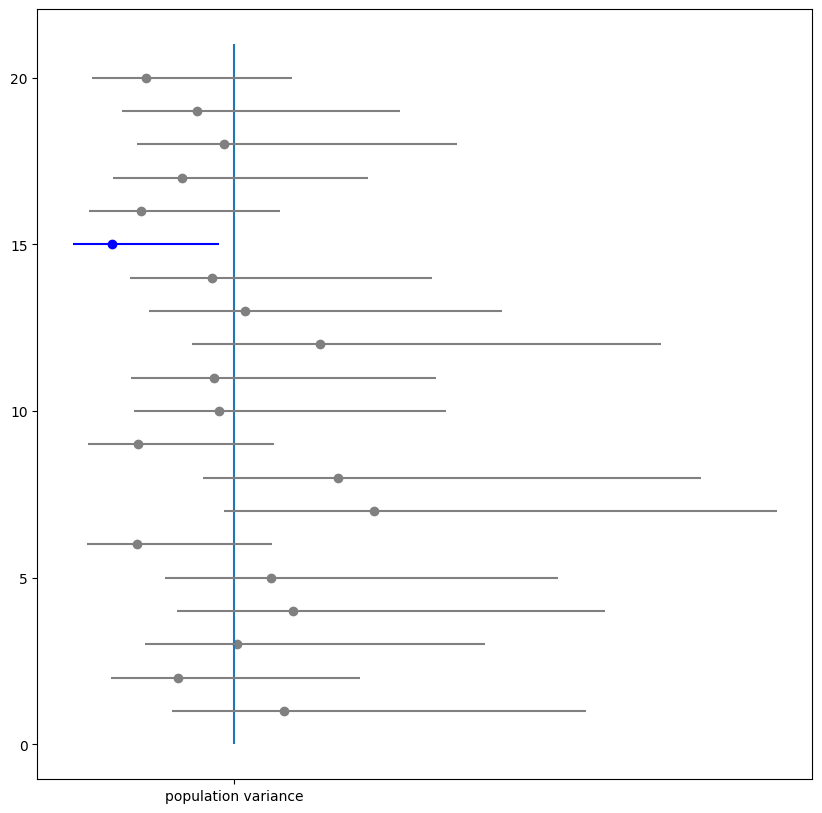

In [35]:
# 10x10 크기의 새로운 그래프 창을 생성합니다.
fig = plt.figure(figsize=(10, 10))
# 기본 좌표축을 추가합니다.
ax = fig.add_subplot(111)

# 자유도가 n-1인 카이 제곱 분포 객체를 생성합니다.
rv = stats.chi2(df=n-1)
# 샘플의 수를 20으로 설정합니다.
n_samples = 20
# p_var에 해당하는 세로선을 그립니다. 이는 모분산을 나타냅니다.
ax.vlines(p_var, 0, 21)
# 20개의 샘플에 대해 반복문을 수행합니다.
for i in range(n_samples):
    # 각 샘플의 분산을 계산합니다. 'ddof=1'은 불편분산을 의미합니다.
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    # 95% 신뢰 구간의 하한을 계산합니다.
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    # 95% 신뢰 구간의 상한을 계산합니다.
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    # 신뢰 구간 안에 모분산(p_var)이 포함되면, 점을 회색으로 표시하고 구간을 회색 선으로 그립니다.
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    # 그렇지 않으면, 점을 파란색으로 표시하고 구간을 파란색 선으로 그립니다.
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
# x축에 모분산을 나타내는 눈금을 설정합니다.
ax.set_xticks([p_var])
# x축 눈금의 라벨을 'population variance'로 설정합니다.
ax.set_xticklabels(['population variance'])

# 생성된 그래프를 화면에 표시합니다.
plt.show()    

In [36]:
# 자유도가 n-1인 카이 제곱 분포 객체를 생성합니다.
rv = stats.chi2(df=n-1)
# 결과를 저장할 변수 'cnt'를 초기화합니다.
cnt = 0
# 각 표본에 대한 반복문을 실행합니다.
for sample_ in samples:
    # 각 표본의 분산을 계산합니다. 'ddof=1'은 불편분산을 의미합니다.
    u_var_ = np.var(sample_, ddof=1)
    # 95% 신뢰 구간의 하한을 계산합니다.
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    # 95% 신뢰 구간의 상한을 계산합니다.
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    # 모분산이 95% 신뢰 구간에 포함되면 'cnt'를 1 증가시킵니다.
    if lcl <= p_var <= ucl:
        cnt += 1

# 모든 표본 중에서 모분산이 95% 신뢰 구간에 포함된 비율을 계산하여 반환합니다.
cnt / len(samples)

0.964

In [37]:
# 자유도가 n-1인 t-분포 객체를 생성합니다.
rv = stats.t(df=n-1)

# 신뢰 구간의 하한(Lower Confidence Limit, LCL)을 계산합니다.
# LCL은 표본평균에서 2.5%의 신뢰수준을 가지는 t-분포의 역생존함수 값을 이용하여 계산됩니다.
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)

# 신뢰 구간의 상한(Upper Confidence Limit, UCL)을 계산합니다.
# UCL은 표본평균에서 97.5%의 신뢰수준을 가지는 t-분포의 역생존함수 값을 이용하여 계산됩니다.
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

# 계산된 LCL과 UCL을 반환합니다. 이는 신뢰 구간의 범위를 나타냅니다.
lcl, ucl

(64.512, 76.288)

In [38]:
enquete_df = pd.read_csv('./python_stat_sample-master/data/ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [39]:
s_mean = enquete.mean()
s_mean

0.709

In [40]:
# stats.norm()을 사용하여 표준 정규 분포 객체를 생성합니다.
rv = stats.norm()

# 신뢰 구간의 하한(Lower Confidence Limit)을 계산합니다.
# s_mean: 샘플 평균, rv.isf(0.025): 97.5 백분위수(2.5%의 상위 경계),
# np.sqrt(s_mean*(1-s_mean)/n): 표준 오차(standard error) 계산
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)

# 신뢰 구간의 상한(Upper Confidence Limit)을 계산합니다.
# s_mean: 샘플 평균, rv.isf(0.975): 2.5 백분위수(97.5%의 상위 경계),
# np.sqrt(s_mean*(1-s_mean)/n): 표준 오차(standard error) 계산
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

# 계산된 하한(lcl)과 상한(ucl)을 출력합니다.
lcl, ucl

(0.681, 0.737)

In [42]:
n_access_df = pd.read_csv('./python_stat_sample-master/data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [44]:
s_mean = n_access.mean()
s_mean

10.444

In [ ]:
# stats.norm()을 사용하여 표준 정규 분포 객체를 생성합니다.
rv = stats.norm()

# 신뢰 구간의 하한(Lower Confidence Limit, LCL)을 계산합니다.
# s_mean: 샘플 평균, rv.isf(0.025): 97.5 백분위수(2.5%의 상위 경계),
# np.sqrt(s_mean/n): 표준 오차(standard error) 계산
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)